In [6]:
from IPython.display import Image

## Data
The objective of this task is to build a model to predict the chlorophyll index of several sites in `data/testing.csv`,
given 16 reflectances per-site, as well as training data in `data/training.csv` and validation data in `data/validation.csv`.

Below is a series of line plots of wavelengths sampled from `data/training.csv`, sorted by chlorophyll value:

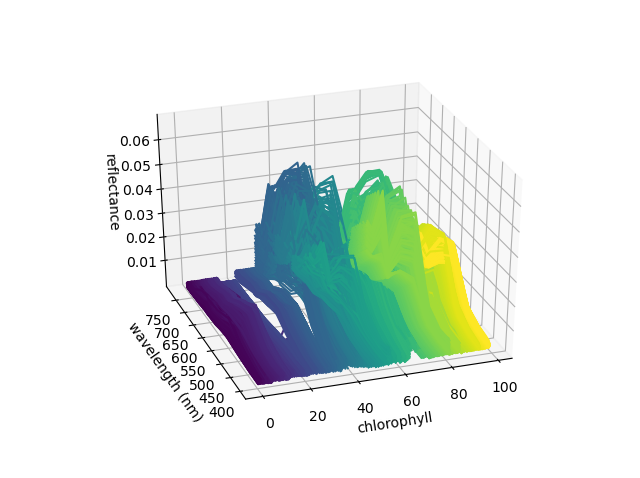

In [7]:
Image("../outputs/0_training_data/0_training_data.png")

This plot shows the pattern to which the model will fit predicted chlorophyll.
I figured that a good rough comparison metric would involve comparing the RMSE of the reference data provided in `validation.csv`
(predicted vs in-situ measurements) with standard deviation of the measurements.

## Model Fitting
I chose to use the Python PyTorch library because, [from what I have read](https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b), it provides a more forgiving, debuggable, and Pythonic interface.

#### Manual Gradient Loss w/ Fixed Learning Rate: `models/1_autograd.py`
Using `requires_grad=True`, I optimized weights with a learning rate of `1e-6`, fitting them to the training data over 10000 iterations.
I chose a hidden layer size of 2/3 of the input layer size plus the output layer size, following a [rule-of-thumb](https://www.heatonresearch.com/2017/06/01/hidden-layers.html) that seemed to make sense.
With 16 inputs, this determined a hidden layer with size of `12`.

Below is a plot of sums of squared error (from predicted to reference) over time, using the above hidden layer size:

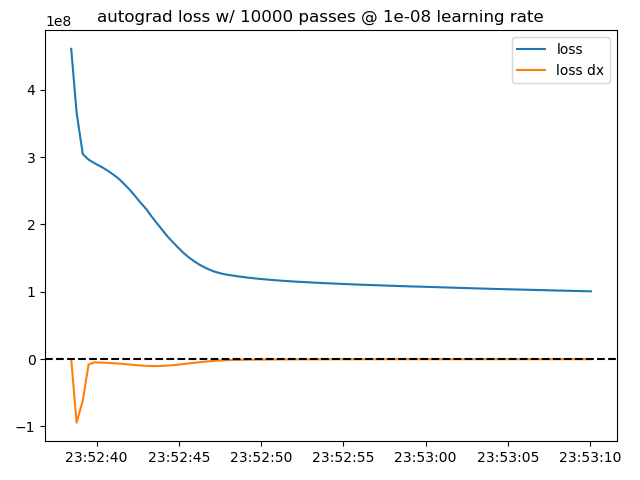

In [8]:
Image("../outputs/1_autograd/1_autograd.png")

After optimizing weights over 10000 iterations on this run, the RMSE of predicted data vs reference data, around `8.5` over several runs, was within 20% of the standard deviation of in-situ measurements, `9.38`.

Results from this model are stored in the `Chl` column of `outputs/1_autograd/testing.csv`.

#### PyTorch Neural Network Module: `models/2_nn.py`
Using PyTorch's `torch.nn` module, I replaced the manual gradient following with building a model with three explicit layers, the built-in Adam optimizer, and a much more liberal initial learning rate.

Below is a plot of sums of mean squared error (from predicted to reference) over time, using the previous hidden layer size (`12`):

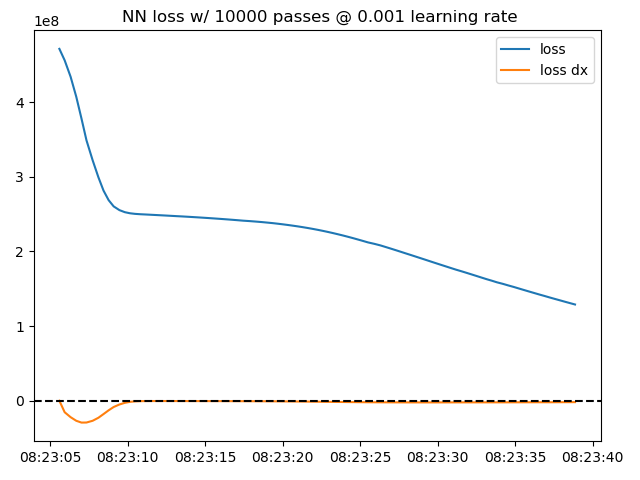

In [9]:
Image("../outputs/2_nn/2_nn.png")

This run showed resulting metrics similar to the previous, with RMSE slightly better at around `7` (versus standard deviation of in-situ measurements `9.38`).

Results from this model are stored in the `Chl` column of `outputs/2_nn/testing.csv`.

#### Optimizing Hidden Layer Size: `models/3_nn_optimH.py`
Since this methodology returns a concrete metric (RMSE) that can be minimized, this means that the size of the hidden layer can also be optimized.

In `models/3_nn_optimH.py`, I iterated over several different hidden layer sizes and plotted their RMSE values:

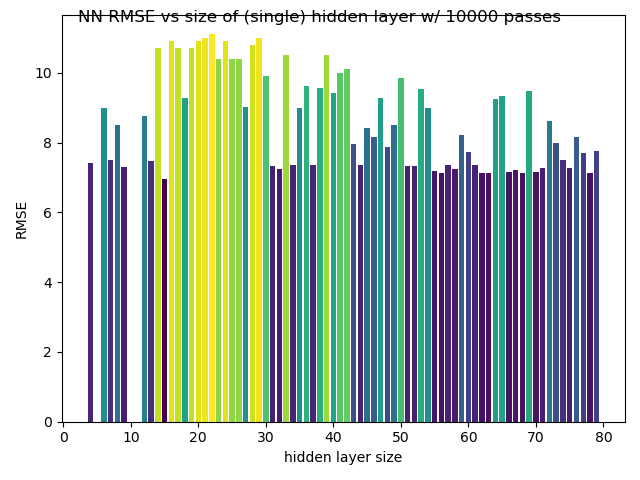

In [10]:
Image("../outputs/3_nn_optimH/3_nn_optimH.png")

This plot shows an apparent increase in RMSE in the hidden layer sizes between 15 and 30.
Otherwise, there is no classic V pattern that would indicate an optimization curve, so I would say it is inconclusive without further data or statistical analysis.

### Results
As there did not appear to be a conclusive correlation with the hidden layer size from the perturbation above, I instead submitted the filled `testing.csv` from the initial `torch.nn` (with hidden layer size of `12`).

### Further Work
More work can be done to optimize multiple models per configuration, as the RMSE appears to vary over runs of the same values. This might make the data and make it easier to find a true critical point in the size of the hidden layer.

Additionally, several other factors can be optimized programmatically, including the number of iterations and the learning rate.